<a href="https://colab.research.google.com/github/2312058/Joy-s/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

df = pd.read_csv("advertising.csv")

df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.isnull().sum()


,0
TV,0
Radio,0
Newspaper,0
Sales,0


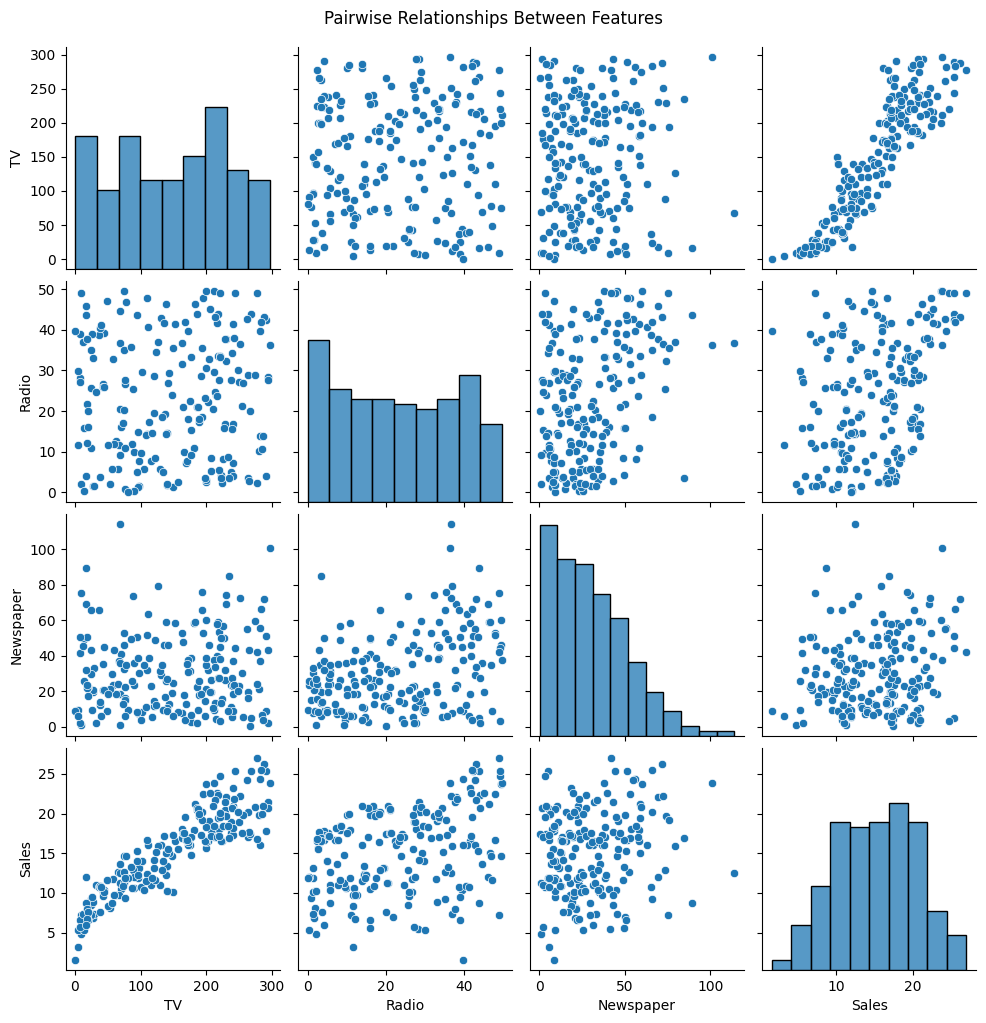

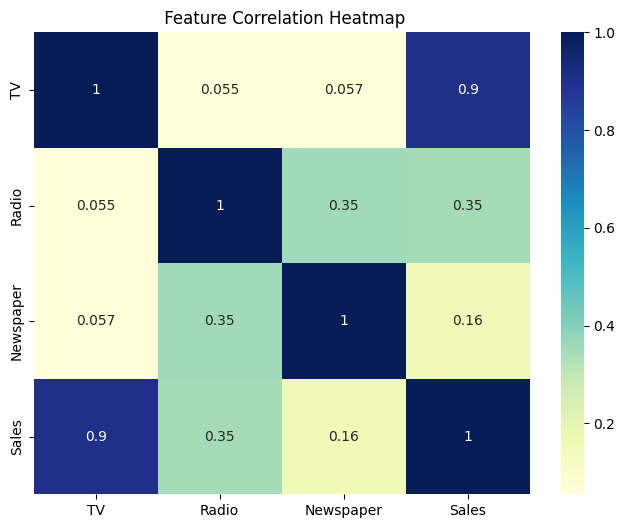

In [ ]:

sns.pairplot(df)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title(" Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


 Mean Squared Error: 2.91
R^2 Score: 0.91


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


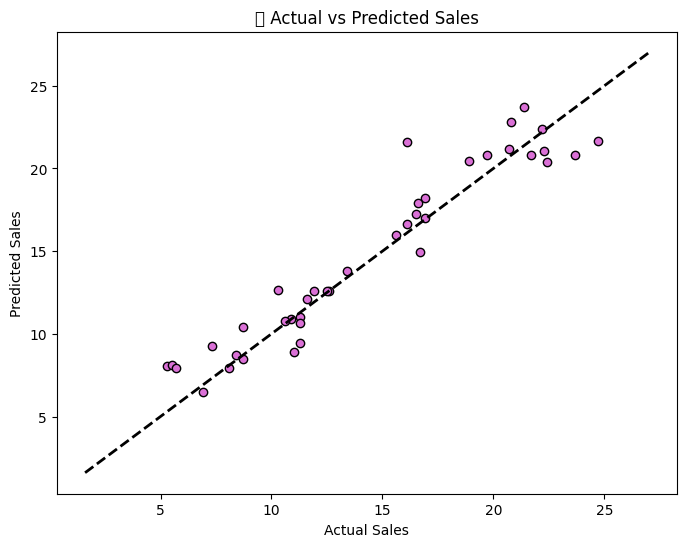

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orchid', edgecolors='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('🔮 Actual vs Predicted Sales')
plt.show()


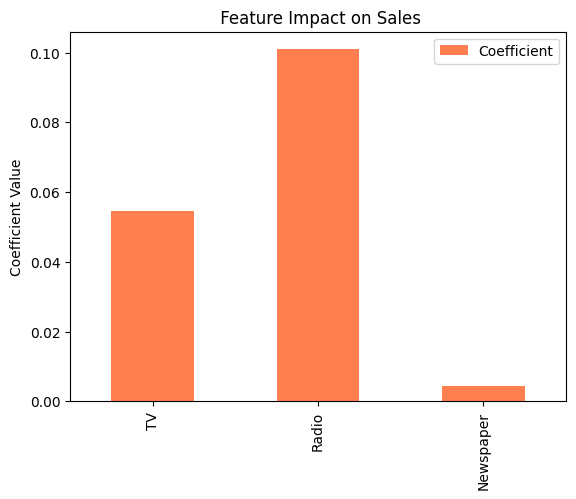

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.plot(kind='bar', color='coral')
plt.title(" Feature Impact on Sales")
plt.ylabel("Coefficient Value")
plt.show()
